# Initial Preparation

## Import Packages

In [1]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport

## Import Data

In [2]:
url = "https://raw.githubusercontent.com/Cameron-Watts/PDS_Piece/main/data/raw/twitter_training.csv"

df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

In [3]:
len(df)

74682

# TEMP-Subset Data

In [4]:
df = df.sample(frac=0.1)

## Visualise and Explore Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7468 entries, 52545 to 16690
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       7468 non-null   int64 
 1   Entity         7468 non-null   object
 2   Sentiment      7468 non-null   object
 3   Tweet_Content  7393 non-null   object
dtypes: int64(1), object(3)
memory usage: 291.7+ KB


In [6]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
52545,10626,RedDeadRedemption(RDR),Neutral,Red Dead Rising 2 had dropped by £0.26 and is ...
2627,1657,CallOfDutyBlackopsColdWar,Negative,NEW TO:.. really really easy download cod trai...
35546,8104,Microsoft,Negative,Really @ Microsoft trying to force people to u...
47442,5739,HomeDepot,Negative,Fuck these hoes forreal.
45629,11832,Verizon,Negative,Disney and Verizon gotta be in this together. ...


In [7]:
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

## Clean Data

<BarContainer object of 4 artists>

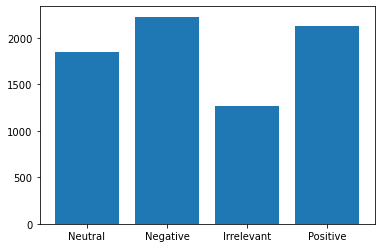

In [8]:
# To see what's going on before dropping datapoints
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

In [9]:
df = df.dropna()

# Further Exploration

In [10]:
df["Sentiment"].unique()

array(['Neutral', 'Negative', 'Irrelevant', 'Positive'], dtype=object)

In [11]:
print(df["Entity"].unique())
print(len(df["Entity"].unique()))

onehot = pd.get_dummies(df["Entity"])

df = df.join(onehot)

df.head()

['RedDeadRedemption(RDR)' 'CallOfDutyBlackopsColdWar' 'Microsoft'
 'HomeDepot' 'Verizon' 'LeagueOfLegends' 'CS-GO' 'ApexLegends' 'Overwatch'
 'GrandTheftAuto(GTA)' 'TomClancysRainbowSix' 'WorldOfCraft' 'Battlefield'
 'FIFA' 'johnson&johnson' 'TomClancysGhostRecon' 'NBA2K' 'Dota2'
 'Hearthstone' 'Xbox(Xseries)' 'Borderlands' 'Facebook' 'Fortnite'
 'Nvidia' 'CallOfDuty' 'PlayStation5(PS5)' 'Cyberpunk2077' 'MaddenNFL'
 'Amazon' 'Google' 'AssassinsCreed' 'PlayerUnknownsBattlegrounds(PUBG)']
32


,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
52545,10626,RedDeadRedemption(RDR),Neutral,Red Dead Rising 2 had dropped by £0.26 and is ...,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2627,1657,CallOfDutyBlackopsColdWar,Negative,NEW TO:.. really really easy download cod trai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35546,8104,Microsoft,Negative,Really @ Microsoft trying to force people to u...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47442,5739,HomeDepot,Negative,Fuck these hoes forreal.,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45629,11832,Verizon,Negative,Disney and Verizon gotta be in this together. ...,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<BarContainer object of 4 artists>

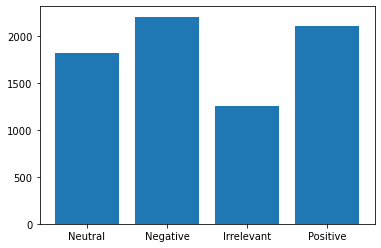

In [12]:
sentiments = list(df["Sentiment"].unique())

sentiment_nums = [len(df[df["Sentiment"] == sentiment]) for sentiment in sentiments]

labels = sentiments

plt.bar(sentiments, sentiment_nums)

## Stop Word Removal and Lemmatization With NLTK

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


def remove_stopwords(ls):
    #Removes stop words and lemmatises
    ls = [lemmatiser.lemmatize(word) for word in ls if word not in (stopwords.words()) and (word.isalpha())]
    
    ls = " ".join(ls)
    return ls

df["Tweet_Content_Split"] = df["Tweet_Content"].apply(word_tokenize)

lemmatiser = WordNetLemmatizer()

df["Tweet_Content_Split"] = df["Tweet_Content_Split"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cameron\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cameron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
list(df["Tweet_Content_Split"])[0]

'Red Dead Rising dropped'

## Tokenisation

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [16]:
tokeniser = Tokenizer(num_words=10000, lower=True)

tokeniser.fit_on_texts(df["Tweet_Content_Split"])

In [17]:
tweet_tokens = tokeniser.texts_to_matrix(list(df["Tweet_Content_Split"]))

## Final Preparation of Data for Model

In [18]:
y = df["Sentiment"]

labels = set(df["Sentiment"])

class_to_index = {"Neutral":0, "Irrelevant":0, "Negative":1, "Positive": 2}

index_to_class = dict((v,k) for k, v in class_to_index.items())

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in df["Sentiment"]])

ids_to_names = lambda y: np.array([index_to_class.get(x) for x in y])

train_labels = names_to_ids(y)

In [19]:
df["Labels"] = train_labels

In [20]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,Tweet_Content_Split,Labels
52545,10626,RedDeadRedemption(RDR),Neutral,Red Dead Rising 2 had dropped by £0.26 and is ...,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,Red Dead Rising dropped,0
2627,1657,CallOfDutyBlackopsColdWar,Negative,NEW TO:.. really really easy download cod trai...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NEW TO really really easy download cod trailer...,1
35546,8104,Microsoft,Negative,Really @ Microsoft trying to force people to u...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Really Microsoft trying force people use Edge Sod,1
47442,5739,HomeDepot,Negative,Fuck these hoes forreal.,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fuck hoe forreal,1
45629,11832,Verizon,Negative,Disney and Verizon gotta be in this together. ...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Disney Verizon got together Its pure trash end,1


## Subsetting Data

In [21]:
y = df["Labels"]

df2 = df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split", "Labels"], axis=1)

In [22]:
array_3 = df2.to_numpy()

full_array = np.concatenate([array_3, tweet_tokens], axis=1)

In [23]:
full_df = pd.DataFrame(full_array)

full_df.shape

(7393, 10032)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(full_df, y, test_size=0.2, random_state=1)

## Build Neural Network with Keras

In [25]:
#Test initial network
import tensorflow as tf

model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=10032),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

## Testing Methods

### Neural Network with Keras

In [26]:
h = model.fit(
     X_train, y_train,
     validation_data=(X_test, y_test),
     epochs=20,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

Epoch 1/20
185/185 [==============================] - 9411s 51s/step - loss: 1.3677 - accuracy: 0.2934 - val_loss: 1.3673 - val_accuracy: 0.3056
Epoch 2/20
 21/185 [==>...........................] - ETA: 2:59:51 - loss: 1.3624 - accuracy: 0.3170

KeyboardInterrupt: 

# Final

## Training With Full Dataset

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(1000,16,input_length=10032),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(
     loss='sparse_categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [ ]:
h = model.fit(
     full_df, y,
     epochs=20,
     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)]
)

## Generating Predictions

## Download and Transform Test Data

In [ ]:
url = "https://raw.githubusercontent.com/Cameron-Watts/PDS_Piece/main/data/raw/twitter_validation.csv"

test_df = pd.read_csv(url, names=["Tweet_ID", "Entity", "Sentiment", "Tweet_Content"])

test_df = test_df.dropna()

In [ ]:
onehot = pd.get_dummies(test_df["Entity"])

test_df = test_df.join(onehot)

test_df.head()

In [ ]:
test_df["Tweet_Content_Split"] = test_df["Tweet_Content"].apply(word_tokenize)
test_df["Tweet_Content_Split"] = test_df["Tweet_Content_Split"].apply(remove_stopwords)

In [ ]:
test_tweet_tokens = tokeniser.texts_to_matrix(list(test_df["Tweet_Content_Split"]))

In [ ]:
y = test_df["Sentiment"]

names_to_ids = lambda y: np.array([class_to_index.get(x) for x in test_df["Sentiment"]])

test_labels = names_to_ids(y)

In [ ]:
y = test_labels

test_df2 = test_df.drop(["Sentiment", "Entity", "Tweet_ID", "Tweet_Content", "Tweet_Content_Split", "Labels"], axis=1)

In [ ]:
model.evaluate(test_df2, y)

## Generate Predictions

In [ ]:
y_pred = model.predict(test_df2)

In [ ]:
y_pred_labels = ids_to_names(y_pred)